# Enhanced protein isoform characterization through long-read proteogenomics 
## Figure 4 and Supplementary Figure 3 
#### Ben Jordan

### Fig. 4: Customized long-read-derived protein database for protein isoform detection. 
a-c, Overlap of peptide (a), gene (b), and protein isoform group (c) identifications from GENCODE versus PacBio database searches.

-----

### Supplementary Fig. 3: Comparison of MS-based proteomic coverage when using different protein databases for MS searching. 
 b-m Overlap of gene, peptide, and protein group identifications when comparing GENCODE versus PacBio-Hybrid in the high confidence space (b, c, j), UniProt versus PacBio-Hybrid in the full gene space (d, e, k), UniProt versus PacBio-Hybrid in the high confidence gene space (f, g, l), and GENCODE versus UniProt in the full gene space (h, i, m).

In [2]:
from mass_spec_venn import make_venn_diagram, make_venn_diagram_three_input
import pandas as pd
import os

import config, data_loader

# all plots go into a directory
if not os.path.exists('plot'):
    os.makedirs('plot')

# all statistics go into a directory
if not os.path.exists('stats'):
    os.makedirs('stats')

# venn diagram db colors
gc_col = config.database_colors['GENCODE']
pb_col = config.database_colors['PacBio']
un_col = config.database_colors['UniProt']

# Peptides 

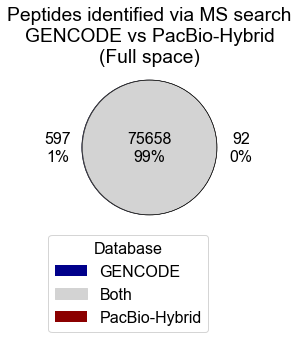

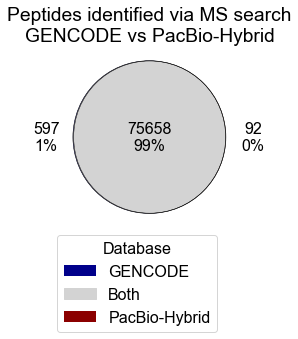

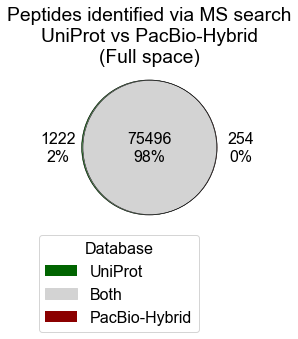

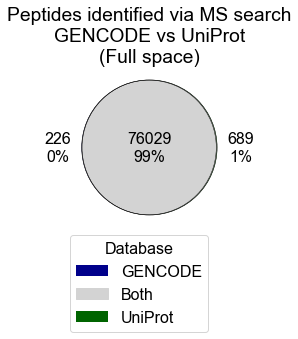

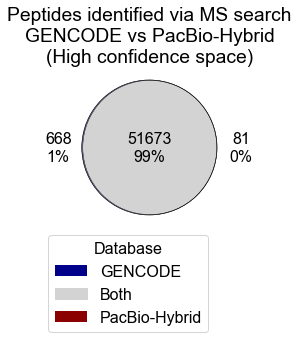

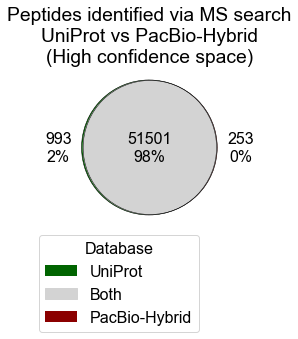

In [2]:
peptides = data_loader.Peptide()


#************************************
# ALL GENES
#************************************
def plot_venn_peptide_all_genes(peptides):
    gencode_peptide_set = set(peptides.gencode_peptide['Full Sequence'].unique())
    pacbio_hybrid_peptide_set = set(peptides.pacbio_hybrid_peptide['Full Sequence'].unique())
    uniprot_peptide_set = set(peptides.uniprot_peptide['Full Sequence'].unique())

    make_venn_diagram(gencode_peptide_set, pacbio_hybrid_peptide_set, gc_col, pb_col, 'GENCODE','PacBio-Hybrid', 'Peptides','(Full space)', 'Fig4b_venn_peptide_GENCODE_PacBio_Hybrid_full_space')
    make_venn_diagram(gencode_peptide_set, pacbio_hybrid_peptide_set, gc_col, pb_col, 'GENCODE','PacBio-Hybrid', 'Peptides','', 'Fig4b_venn_peptide_GENCODE_PacBio_Hybrid_full_space_no_space_info')

    make_venn_diagram(uniprot_peptide_set, pacbio_hybrid_peptide_set, un_col, pb_col, 'UniProt','PacBio-Hybrid', 'Peptides','(Full space)', 'SuppFig3e_venn_peptide_UniProt_PacBio_Hybrid_full_space')
    make_venn_diagram(gencode_peptide_set, uniprot_peptide_set, gc_col, un_col, 'GENCODE','UniProt', 'Peptides','(Full space)', 'SuppFig3i_venn_peptide_GENCODE_UniProt_full_space')
plot_venn_peptide_all_genes(peptides)

#************************************
# High Confidence
#************************************
def plot_venn_peptide_highconf(peptides):
    gencode_peptides = peptides.gencode_peptide[peptides.gencode_peptide['is_high_confidence']]
    uniprot_peptides = peptides.uniprot_peptide[peptides.uniprot_peptide['is_high_confidence']]
    pacbio_peptides = peptides.pacbio_hybrid_peptide[peptides.pacbio_hybrid_peptide['is_high_confidence']]
    gencode_peptide_set = set(gencode_peptides['Full Sequence'].unique())
    pacbio_hybrid_peptide_set = set(pacbio_peptides['Full Sequence'].unique())
    uniprot_peptide_set = set(uniprot_peptides['Full Sequence'].unique())

    make_venn_diagram(gencode_peptide_set, pacbio_hybrid_peptide_set, gc_col, pb_col, 'GENCODE','PacBio-Hybrid', 'Peptides','(High confidence space)',  'SuppFig3c_venn_peptide_GENCODE_PacBio_Hybrid_highconf')
    make_venn_diagram(uniprot_peptide_set, pacbio_hybrid_peptide_set, un_col, pb_col, 'UniProt','PacBio-Hybrid', 'Peptides','(High confidence space)',  'SuppFig3g_venn_peptide_UniProt_PacBio_Hybrid_highconf')
    # make_venn_diagram(gencode_peptide_set, uniprot_peptide_set, gc_col, un_col, 'GENCODE','UniProt', 'Peptides','(High confidence space)',  'SuppFig3_venn_peptide_GENCODE_UniProt_highconf')

plot_venn_peptide_highconf(peptides)

# Gene 

4942
4914
4927


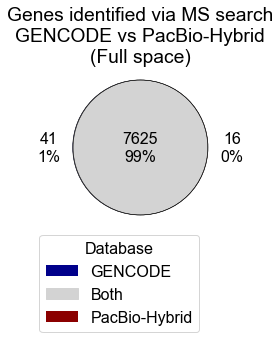

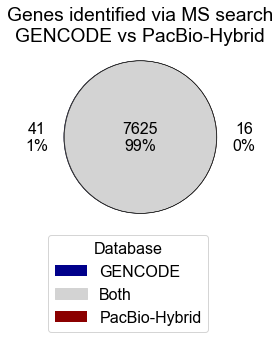

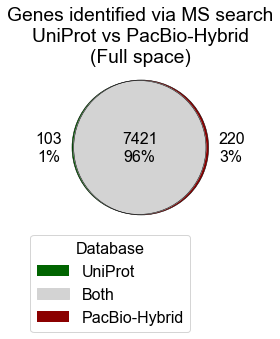

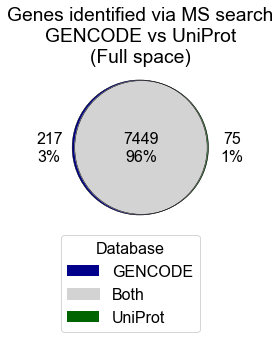

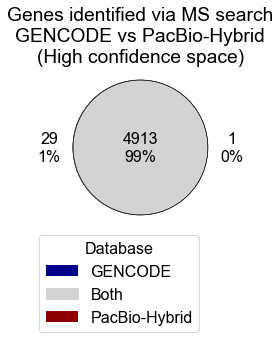

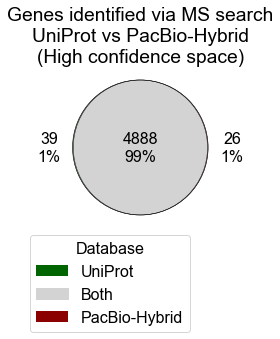

In [3]:
protein_groups = data_loader.ProteinGroup()

def get_gene_set(protein_group):
    gene_set = set()
    for genes in protein_group['genes']:
        gene_set.update(genes)
    return gene_set

def plot_gene_venn_all_genes(protein_groups):
    gencode_gene_set = get_gene_set(protein_groups.gencode_protein_group)
    pacbio_hybrid_gene_set = get_gene_set(protein_groups.pacbio_hybrid_protein_group)
    uniprot_gene_set = get_gene_set(protein_groups.uniprot_protein_group)
    make_venn_diagram(gencode_gene_set, pacbio_hybrid_gene_set, gc_col, pb_col, 'GENCODE','PacBio-Hybrid', 'Genes','(Full space)', 'Fig4a_venn_gene_GENCODE_PacBio_Hybrid_full_space')
    make_venn_diagram(gencode_gene_set, pacbio_hybrid_gene_set, gc_col, pb_col, 'GENCODE','PacBio-Hybrid', 'Genes','', 'Fig4a_venn_gene_GENCODE_PacBio_Hybrid_full_space_no_space_info')

    make_venn_diagram(uniprot_gene_set, pacbio_hybrid_gene_set, un_col, pb_col, 'UniProt','PacBio-Hybrid', 'Genes', '(Full space)','SuppFig3d_venn_gene_UniProt_PacBio_Hybrid_full_space')
    make_venn_diagram(gencode_gene_set, uniprot_gene_set, gc_col, un_col, 'GENCODE','UniProt', 'Genes','(Full space)', 'SuppFig3h_venn_gene_GENCODE_UniProt_full_space')
plot_gene_venn_all_genes(protein_groups)


def plot_gene_venn_high_confidence(protein_groups):
    gencode_protein_group = protein_groups.gencode_protein_group[protein_groups.gencode_protein_group['is_high_confidence']]
    pacbio_hybrid_protein_group = protein_groups.pacbio_hybrid_protein_group[protein_groups.pacbio_hybrid_protein_group['is_high_confidence']]
    uniprot_protein_group = protein_groups.uniprot_protein_group[protein_groups.uniprot_protein_group['is_high_confidence']]
    gencode_gene_set = get_gene_set(gencode_protein_group).intersection(data_loader.genes_in_hiconf_space)
    pacbio_hybrid_gene_set = get_gene_set(pacbio_hybrid_protein_group).intersection(data_loader.genes_in_hiconf_space)
    uniprot_gene_set = get_gene_set(uniprot_protein_group).intersection(data_loader.genes_in_hiconf_space)
    print(len(gencode_gene_set))
    print(len(pacbio_hybrid_gene_set))
    print(len(uniprot_gene_set))
    make_venn_diagram(gencode_gene_set, pacbio_hybrid_gene_set, gc_col, pb_col, 'GENCODE','PacBio-Hybrid', 'Genes','(High confidence space)', 'SuppFig3b_venn_gene_GENCODE_PacBio_Hybrid_highconf')
    make_venn_diagram(uniprot_gene_set, pacbio_hybrid_gene_set, un_col, pb_col, 'UniProt','PacBio-Hybrid', 'Genes','(High confidence space)', 'SuppFig3f_venn_gene_UniProt_PacBio_Hybrid_highconf')
    # make_venn_diagram(gencode_gene_set, uniprot_gene_set, gc_col, un_col, 'GENCODE','UniProt', 'Genes', 'SuppFig3_venn_gene_GENCODE_UniProt_highconf')

plot_gene_venn_high_confidence(protein_groups)

# Protein Groups

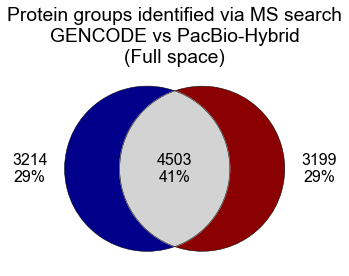

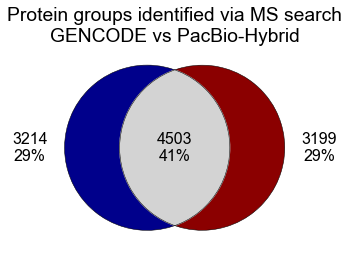

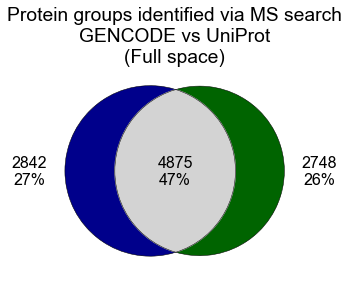

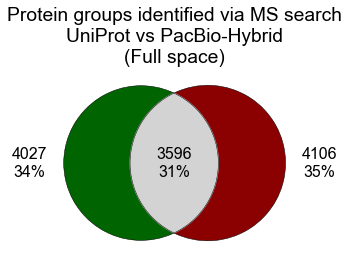

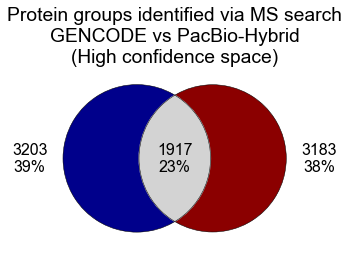

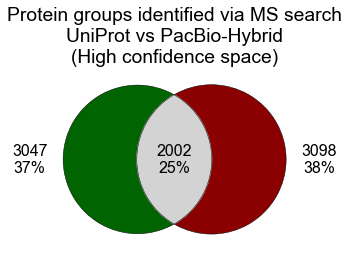

In [4]:
class VennDataBase:
    def __init__(self, name, database, color) -> None:
        self.name = name
        self.database = database
        self.color = color



# load data - dict where key is sheet name, value is dataframe of sheet
gencode_pacbio = pd.read_excel(f'{config.PIPELINE_RESULTS_DIRECTORY}/protein_group_compare/ProteinInference_GENCODE_PacBio_comparisons.xlsx', sheet_name=None)
uniprot_gencode = pd.read_excel(f'{config.PIPELINE_RESULTS_DIRECTORY}/protein_group_compare/ProteinInference_GENCODE_UniProt_comparisons.xlsx', sheet_name=None)
uniprot_pacbio = pd.read_excel(f'{config.PIPELINE_RESULTS_DIRECTORY}/protein_group_compare/ProteinInference_UniProt_PacBio_comparisons.xlsx', sheet_name=None)

protein_groups = data_loader.ProteinGroup()

pacbio_database = VennDataBase('PacBio-Hybrid', protein_groups.pacbio_hybrid_protein_group,  config.database_colors['PacBio'])
gencode_database = VennDataBase('GENCODE', protein_groups.gencode_protein_group, config.database_colors['GENCODE'])
uniprot_database = VennDataBase('UniProt', protein_groups.uniprot_protein_group, config.database_colors['UniProt'])

# filter for high confidence genes
def filter_for_genes_in_high_conf_space(row):
    for gene in str(row.iloc[1]).split('|'):
        if gene in data_loader.genes_in_hiconf_space:
            return True
    # for mappings that involve both pacbio and ref database
    # check that genes mapped to both are present in space
    if len(row) > 9:
        for gene in str(row.iloc[9]).split('|'):
            if gene in data_loader.genes_in_hiconf_space:
                return True
    return False

     

def plot_venn_protein_group(left_database, right_database, match_table, space, figure):
    overlap_size = len(match_table)
    left_size = len(left_database.database) - overlap_size
    right_size = len(right_database.database) - overlap_size

    make_venn_diagram_three_input(
        left_size, right_size, overlap_size, 
        left_database.color, right_database.color, 
        left_database.name, right_database.name, 
        cat='Protein groups',space=space, figure=figure)

plot_venn_protein_group(gencode_database, pacbio_database, gencode_pacbio['ProteinGroup_ExactMatches'],'(Full space)', f'Fig4c_ProteinGroup_GENCODE_PacBio_full_space') 
plot_venn_protein_group(gencode_database, pacbio_database, gencode_pacbio['ProteinGroup_ExactMatches'],'', f'Fig4c_ProteinGroup_GENCODE_PacBio_full_space_no_space_info') 

plot_venn_protein_group(gencode_database, uniprot_database, uniprot_gencode['ProteinGroup_ExactMatches'],'(Full space)', f'SuppFig3m_ProteinGroup_GENCODE_UnProt_full_space') 
plot_venn_protein_group(uniprot_database, pacbio_database, uniprot_pacbio['ProteinGroup_ExactMatches'],'(Full space)', f'SuppFig3k_ProteinGroup_UniProt_PacBio_full_space') 


def plot_venn_protein_group_high_confidence(left_database, right_database, match_table, figure):
    left_database.database = left_database.database[left_database.database['is_high_confidence']]
    right_database.database = right_database.database[right_database.database['is_high_confidence']]
    match_table['in_high_conf_space'] = match_table.apply(filter_for_genes_in_high_conf_space, axis=1)
    match_table = match_table[match_table['in_high_conf_space']==True].drop(columns=['in_high_conf_space'])
    plot_venn_protein_group(left_database, right_database, match_table, '(High confidence space)', figure)

plot_venn_protein_group_high_confidence(gencode_database, pacbio_database, gencode_pacbio['ProteinGroup_ExactMatches'], f'SuppFig3j_ProteinGroup_GENCODE_PacBio_high_confidence') 
# plot_venn_protein_group_high_confidence(gencode_database, uniprot_database, uniprot_gencode['ProteinGroup_ExactMatches'], f'SuppFig3m_ProteinGroup_GENCODE_UnProt_high_confidence') 
plot_venn_protein_group_high_confidence(uniprot_database, pacbio_database, uniprot_pacbio['ProteinGroup_ExactMatches'], f'SuppFig3l_ProteinGroup_UniProt_PacBio_high_confidence') 

